In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Genesis 1.3 v4 examples

Tools for Version 4 are under development. 

There is not a Genesis4 class yet.


In [2]:
from genesis4 import readers, writers

import numpy as np

# Read Field h5

In [3]:
import h5py
with h5py.File('../devel4/rad_field.fld.h5', 'r') as h5:
    DFL, PARAM = readers.load_genesis4_fields(h5)

In [4]:
DFL.shape, DFL.dtype, PARAM

((301, 301, 3312),
 dtype('complex128'),
 {'gridpoints': 301,
  'gridsize': 1.3333333333333333e-05,
  'refposition': 0.0,
  'wavelength': 3.02995e-10,
  'slicecount': 3312,
  'slicespacing': 3.02995e-09})

# Write Wavefront in openPMD-wavefront

In [5]:
writers.write_openpmd_wavefront('genesis4_wavefront.h5', DFL, PARAM, verbose=True)

Writing wavefront (dfl data) to file genesis4_wavefront.h5


'genesis4_wavefront.h5'

In [6]:

# Read back
with h5py.File('genesis4_wavefront.h5', 'r') as h5:
    print(list(h5['data']['000000']['meshes']))
    
    g = h5['data/000000/meshes/electricField']
    print(dict(g.attrs))
    
    # Get 
    E2 = h5['data/000000/meshes/electricField/x'][:]


['electricField']
{'axisLabels': array(['x', 'y', 'z'], dtype=object), 'geometry': 'cartesian', 'gridGlobalOffset': array([-1.33333333e-05, -1.33333333e-05, -5.01759720e-06]), 'gridSpacing': array([8.88888889e-08, 8.88888889e-08, 3.02995000e-09]), 'gridUnitDimension': array([[1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0]]), 'gridUnitSI': array([1., 1., 1.]), 'photonEnergy': 4091.9552610835253, 'photonEnergyUnitDimension': array([ 2,  1, -2,  0,  0,  0,  0]), 'photonEnergyUnitSI': 1.602176634e-19, 'timeOffset': 0.0, 'unitDimension': array([ 1,  1, -3, -1,  0,  0,  0])}


In [ ]:
# Data is the same
np.all(E2 == DFL)

# Plot

Simple plot

In [10]:
# Nicer plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

import numpy as np

In [19]:
# Sum over y and compute the absolute square 
dat2 = np.abs(np.sum(DFL, axis=1))**2

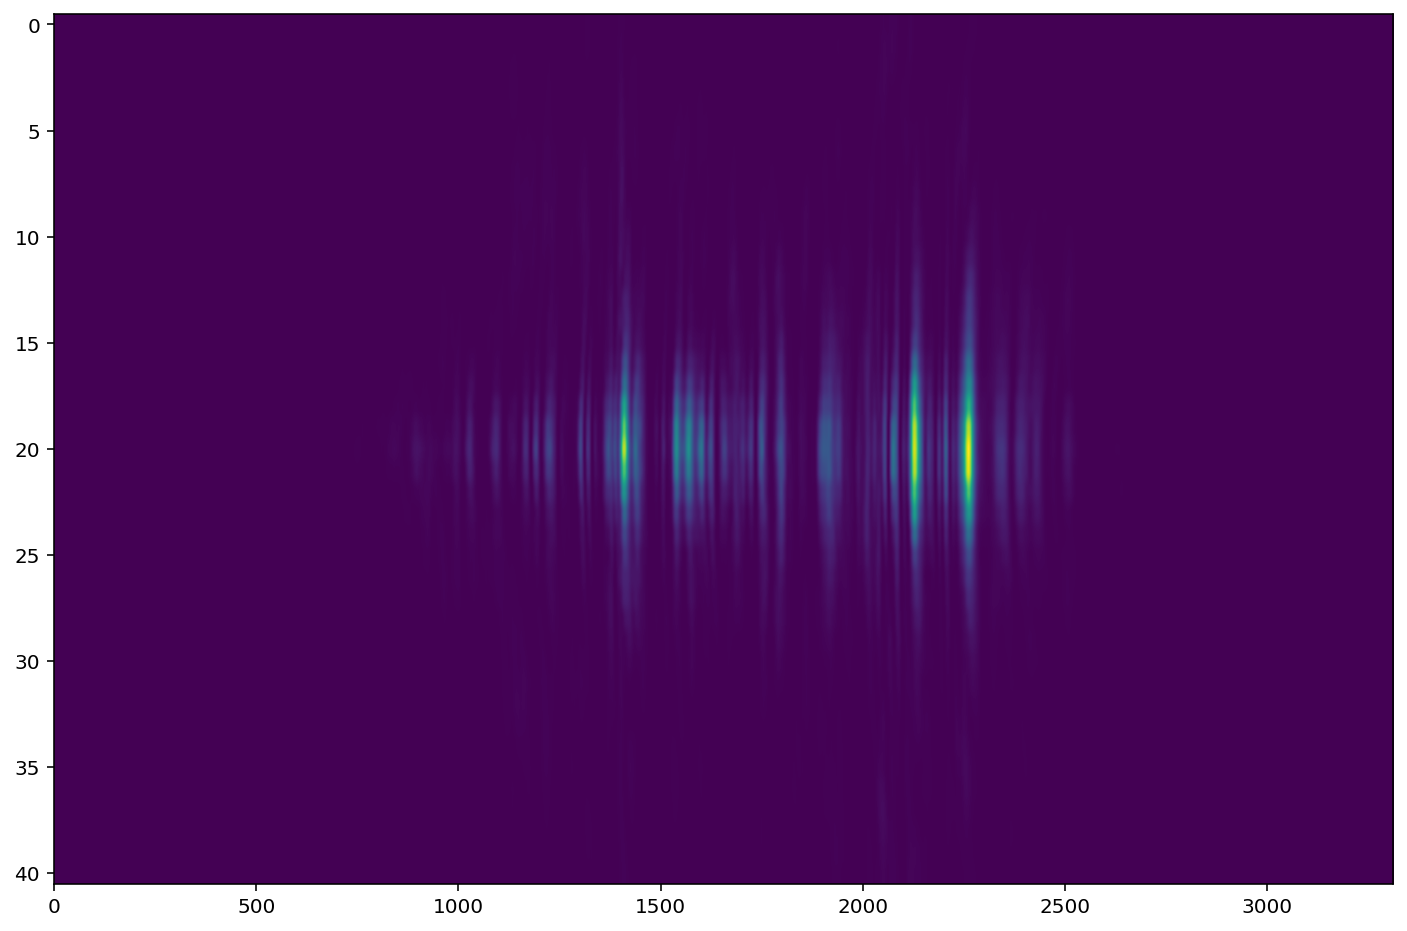

In [20]:
# Plot the center
plt.imshow(dat2[130:-130,:], aspect='auto')

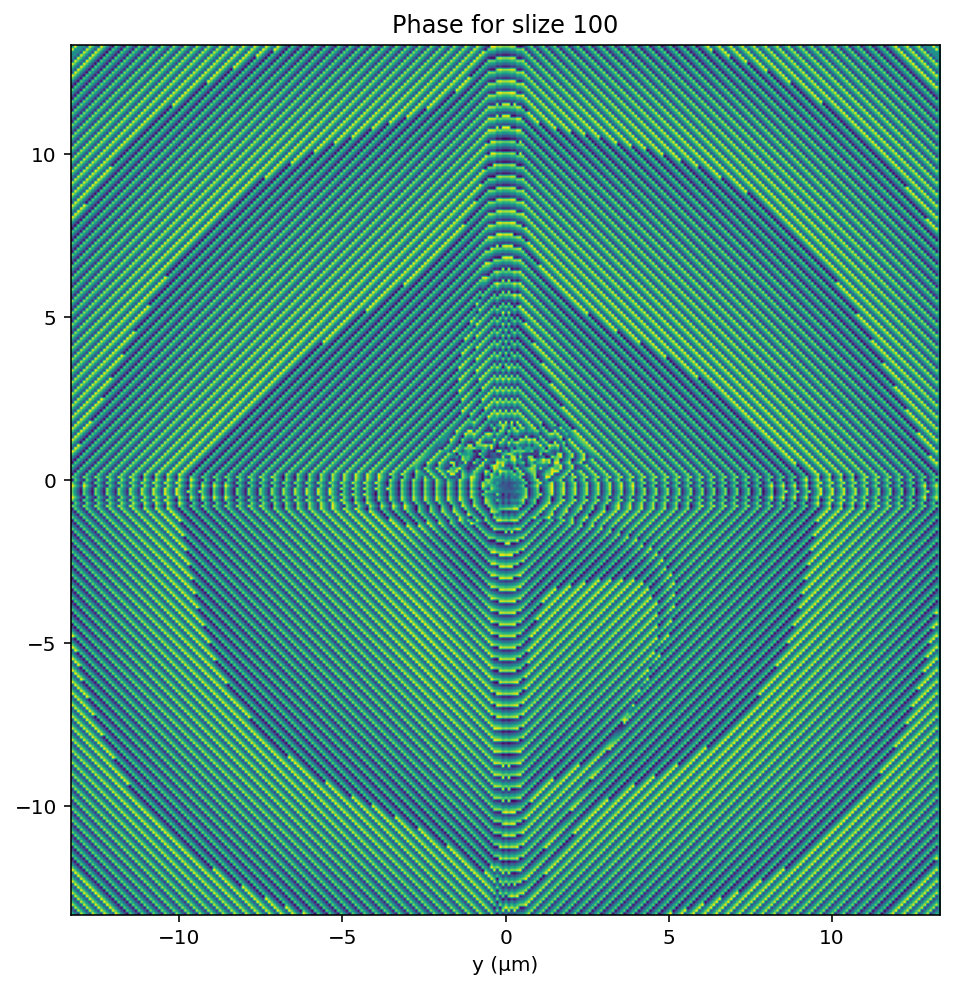

In [21]:
def plot_slice(i=0):
    
    dat = np.angle(DFL[:,:,i])
    
    dx = PARAM['gridsize']*1e6
    plt.xlabel('x (µm)')
    plt.xlabel('y (µm)')
    plt.title(f'Phase for slize {i}')
    plt.imshow(dat.T, origin='lower', extent=[-dx,dx,-dx,dx])
plot_slice(i=100)

In [22]:
from ipywidgets import interact

In [24]:
interact(plot_slice, i=(0,len(DFL[0,0,:])-1, 1))

interactive(children=(IntSlider(value=0, description='i', max=3311), Output()), _dom_classes=('widget-interact…

<function __main__.plot_slice(i=0)>

# Cleanup 

In [25]:
!rm genesis4_wavefront.h5